In [24]:
# from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import numpy as np
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahdiraghib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_successful = pd.read_csv('Hot100.csv')
df_successful['year'] = df_successful['WeekID'].str[:4]
month = df_successful['WeekID'].str[5:7]
df_successful['month'] = month
# df_unsuccessful = pd.read_csv('UnsuccessfulSong.csv')

# reset size of columns to default
pd.set_option('display.max_colwidth', 80)

df_successful.head()

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment,year,month
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-08-02,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,1,"For your love, oh, I would do anything\nI would do anything, for your love\n...",0.500000,1958,08
1,1958-08-02,1176,http://www.billboard.com/charts/hot-100/1958-08-02,20,Do You Want To Dance,Bobby Freeman,Do You Want To DanceBobby Freeman,1,NaN,20,1,Do you want to dance and hold my hand?\nTell me baby I'm your lover man\nOh ...,0.000000,1958,08
2,1958-08-02,7536,http://www.billboard.com/charts/hot-100/1958-08-02,52,Early In The Morning,The Rinky-Dinks,Early In The MorningThe Rinky-Dinks,1,NaN,52,1,Well...\n\nYou're gonna miss me\nEarly in the mornin'\nOne of these days ......,0.028175,1958,08
3,1958-08-02,7028,http://www.billboard.com/charts/hot-100/1958-08-02,17,Endless Sleep,Jody Reynolds,Endless SleepJody Reynolds,1,NaN,17,1,"VERSE 1\nThe night was black, rain falling down\nLooked for my Baby, she's n...",-0.089815,1958,08
4,1958-08-02,27738,http://www.billboard.com/charts/hot-100/1958-08-02,57,You Need Hands,Eydie Gorme,You Need HandsEydie Gorme,1,NaN,57,1,You need hands\nTo hold someone you care for\nYou need hands\nTo show that y...,0.278788,1958,08


In [30]:
df_successful = df_successful.drop_duplicates(subset=['Song'], keep='first')
df_successful = df_successful.reset_index(drop=True)

In [33]:
def preprocess(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [34]:
from rake_nltk import Rake

def get_keywords(text):
    retake = Rake()
    retake.extract_keywords_from_text(text)
    keywords = retake.get_ranked_phrases()[:5]
    return keywords
   

In [35]:
df_successful['Keywords'] = df_successful['Lyrics'].apply(get_keywords)
df_successful.head()


,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment,year,month,Keywords
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-08-02,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,1,"For your love, oh, I would do anything\nI would do anything, for your love\n...",0.500000,1958,08,"[would go anywhere, heart beat, would go, get foolish, anywhere]"
1,1958-08-02,1176,http://www.billboard.com/charts/hot-100/1958-08-02,20,Do You Want To Dance,Bobby Freeman,Do You Want To DanceBobby Freeman,1,NaN,20,1,Do you want to dance and hold my hand?\nTell me baby I'm your lover man\nOh ...,0.000000,1958,08,"[lover man oh baby, night oh baby, night oh baby, dance well, dance well]"
2,1958-08-02,7536,http://www.billboard.com/charts/hot-100/1958-08-02,52,Early In The Morning,The Rinky-Dinks,Early In The MorningThe Rinky-Dinks,1,NaN,52,1,Well...\n\nYou're gonna miss me\nEarly in the mornin'\nOne of these days ......,0.028175,1958,08,"[yeah ... yeah ... well ... early, yeah ... well ... ya know, ya know ... ye..."
3,1958-08-02,7028,http://www.billboard.com/charts/hot-100/1958-08-02,17,Endless Sleep,Jody Reynolds,Endless SleepJody Reynolds,1,NaN,17,1,"VERSE 1\nThe night was black, rain falling down\nLooked for my Baby, she's n...",-0.089815,1958,08,"[deep â  come join, chorus 1 verse 3 ran, angry sea chorus 2, say â , sa..."
4,1958-08-02,27738,http://www.billboard.com/charts/hot-100/1958-08-02,57,You Need Hands,Eydie Gorme,You Need HandsEydie Gorme,1,NaN,57,1,You need hands\nTo hold someone you care for\nYou need hands\nTo show that y...,0.278788,1958,08,"[feel nobody wants, brand new baby, need tender hands, need hands, need hands]"


In [36]:
pd.set_option('display.max_colwidth', 1000)

pd.set_option('display.max_colwidth', 80)


df_successful['Keywords'].head(10)


0                   [would go anywhere, heart beat, would go, get foolish, anywhere]
1          [lover man oh baby, night oh baby, night oh baby, dance well, dance well]
2    [yeah ... yeah ... well ... early, yeah ... well ... ya know, ya know ... ye...
3    [deep â  come join, chorus 1 verse 3 ran, angry sea chorus 2, say â , sa...
4     [feel nobody wants, brand new baby, need tender hands, need hands, need hands]
5    [oh uh oh ratta ta ta, oh uh oh ratta ta ta, oh uh oh ratta ta ta, oh uh oh ...
6                          [ever say good night, ever say good night, say, say, say]
7                            [blue boy )..., blue boy, blue boy, blue boy, blue boy]
8    [please come back bella mia hurry back, cara mia ti amo solo tu, solo tu sol...
9    [asi como besas tu pero besa pronto porque estou sufriendo kiss, mas pero mu...
Name: Keywords, dtype: object

In [37]:
df_successful = df_successful[df_successful['Lyrics'].notna()]
df_successful = df_successful.reset_index(drop=True)

In [39]:
df_successful['Lyrics'] = df_successful['Lyrics'].apply(lambda x: [item for item in x if item != 'â'])
df_successful['Lyrics'] = df_successful['Lyrics'].apply(lambda x: [item for item in x if item != 'â€™'])
df_successful['Keywords'] = df_successful['Keywords'].apply(lambda x: [item for item in x if item != 'â'])
df_successful['Keywords'] = df_successful['Keywords'].apply(lambda x: [item for item in x if item != 'â€™'])

In [40]:
df_successful['Lyrics'] = df_successful['Lyrics'].apply(lambda x: [item for item in x if item != ''])
df_successful['Keywords'] = df_successful['Keywords'].apply(lambda x: [item for item in x if item != ''])


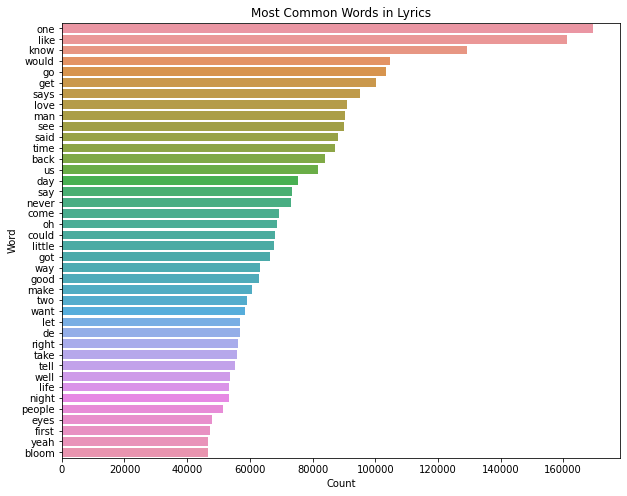

In [41]:
most_common_words = Counter([item for sublist in df_successful['Lyrics'] for item in sublist]).most_common(40)
most_common_words

plt.figure(figsize=(10, 8))
sns.barplot(x=[i[1] for i in most_common_words], y=[i[0] for i in most_common_words])
plt.title('Most Common Words in Lyrics')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [42]:
most_common_words_year = df_successful.groupby('year')['Lyrics'].apply(lambda x: Counter([item for sublist in x for item in sublist]).most_common(10)).reset_index()
most_common_words_year

# plt.figure(figsize=(20, 20))
# for i, year in enumerate(most_common_words_year['year'].unique()):
#     plt.subplot(5, 4, i+1)
#     sns.barplot(x=[i[1] for i in most_common_words_year[most_common_words_year['year']==year]['Lyrics'].values[0]], y=[i[0] for i in most_common_words_year[most_common_words_year['year']==year]['Lyrics'].values[0]])
#     plt.title(year)
#     plt.xlabel('Count')
#     plt.ylabel('Word')
# plt.show()

,year,Lyrics
0,1958,"[(one, 4999), (like, 4346), (says, 4324), (go, 3432), (know, 3389), (would, ..."
1,1959,"[(one, 10082), (like, 7866), (would, 7078), (says, 6753), (know, 6374), (man..."
2,1960,"[(one, 7848), (says, 6913), (like, 6638), (know, 5675), (go, 5149), (would, ..."
3,1961,"[(one, 9840), (like, 8597), (know, 6745), (would, 6661), (said, 6130), (says..."
4,1962,"[(one, 7412), (like, 6476), (says, 5900), (know, 5310), (go, 4743), (said, 4..."
...,...,...
57,2015,"[(like, 1186), (oh, 1008), (got, 956), (love, 945), (know, 832), (chorus, 80..."
58,2016,"[(like, 1426), (know, 1200), (oh, 1092), (yeah, 1010), (got, 961), (chorus, ..."
59,2017,"[(yeah, 1898), (like, 1413), (know, 1067), (got, 1043), (chorus, 1025), (ù, ..."
60,2018,"[(yeah, 2742), (like, 2197), (got, 1454), (know, 1383), (chorus, 1360), (get..."


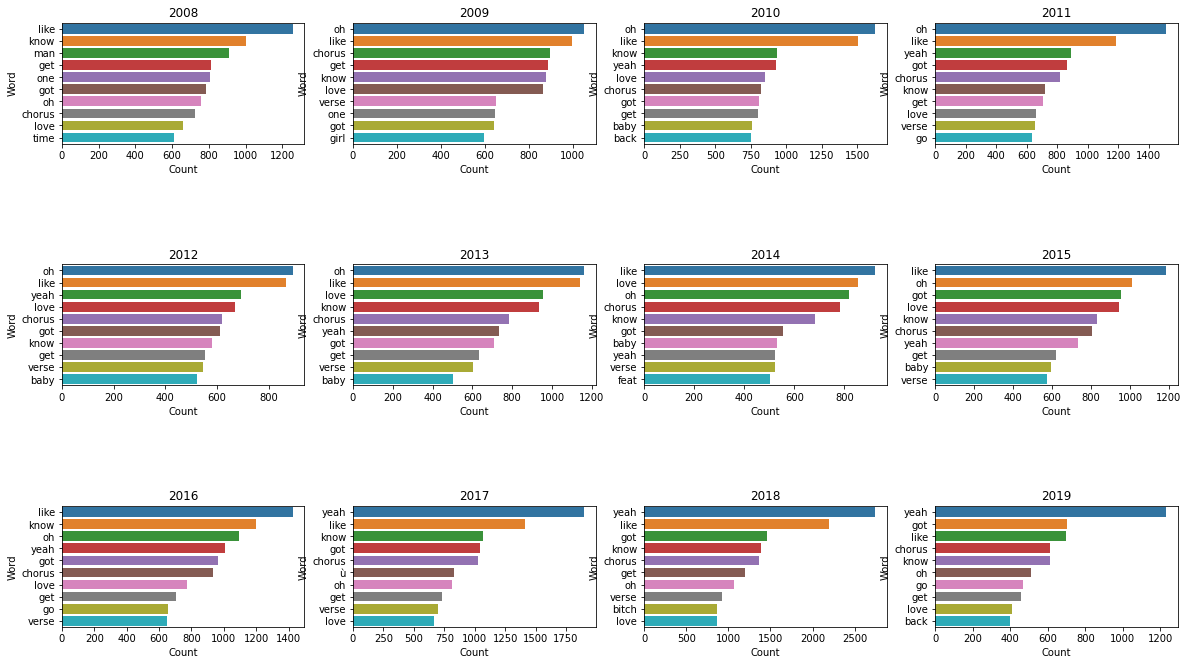

In [43]:
plt.figure(figsize=(20, 20))
for i, year in enumerate(most_common_words_year['year'].unique()[-12:]):
    plt.subplot(5, 4, i+1)
    sns.barplot(x=[i[1] for i in most_common_words_year[most_common_words_year['year']==year]['Lyrics'].values[0]], y=[i[0] for i in most_common_words_year[most_common_words_year['year']==year]['Lyrics'].values[0]])
    plt.title(year)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.subplots_adjust(hspace=1)
plt.show()

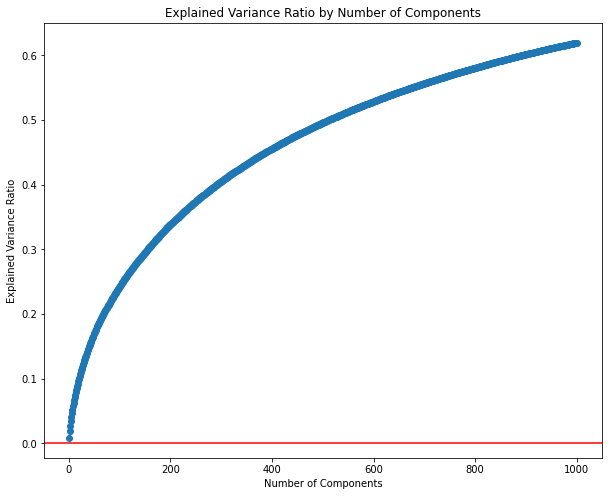

In [44]:
#  song variance explanation using svd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_successful['Lyrics'].apply(lambda x: ' '.join(x)))

svd = TruncatedSVD(n_components=1000)
svd_matrix = svd.fit_transform(tfidf_matrix)

svd.explained_variance_ratio_

plt.figure(figsize=(10, 8))
plt.plot(range(1, 1001), svd.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()
